Creating Train features Excel

In [7]:
import pandas as pd
import cv2
import numpy as np
import os
import time

from Feature_Extraction import (
    extract_mass_features,
    extract_mc_features,
    build_master_vector
)

from MASS_Detection import get_mass_data
from MCs import get_mc_data


# =========================
# FEATURE COLUMNS
# =========================
FEATURE_COLUMNS = [
    'Area','Perimeter','Circularity','Eccentricity','Solidity','Extent',
    'Mean_Intensity','Max_Intensity','Std_Intensity',
    'Contrast','Dissimilarity','Homogeneity','Energy','Correlation','ASM',
    'MC_Count','MC_AvgArea','MC_StdArea','MC_Density','MC_MeanIntensity',
    'Label'
]

# =========================
# PATHS
# =========================
INPUT_CSV  = r"train_dataset.csv"

OUTPUT_XLS = r"final_svm_features_train_dataset.xlsx"
# Create Excel file if it does not exist
if not os.path.exists(OUTPUT_XLS):
    pd.DataFrame(columns=FEATURE_COLUMNS).to_excel(OUTPUT_XLS, index=False)
    print(f"📁 Created Excel file: {OUTPUT_XLS}")


# =========================
# LOAD DATA
# =========================
df = pd.read_csv(INPUT_CSV)
# =========================
# RESUME IF FILE EXISTS
# =========================
if os.path.exists(OUTPUT_XLS):
    saved_df = pd.read_excel(OUTPUT_XLS)
    processed_count = len(saved_df)
    print(f"🔁 Resuming from row {processed_count + 1}")
else:
    saved_df = pd.DataFrame(columns=FEATURE_COLUMNS)
    processed_count = 0


# =========================
# PROCESS ROWS
# =========================
start_total = time.time()

for idx in range(processed_count, len(df)):

    row = df.iloc[idx]

    print(f"\n🚀 STARTING row {idx + 1}/{len(df)} | {row['PATH']}")
    row_start_time = time.time()

    img_path = row['PATH']
    label    = row['TYPE']

    # Load image
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f"❌ Could not read {img_path}")
        continue

    # MASS PREPROCESSING
    mass_region, clean_mask = get_mass_data(img)
    if mass_region is None or clean_mask is None:
        print(f"⚠️ No mass detected in {img_path}")
        continue

    # MASS FEATURES
    mass_features = extract_mass_features(
        original_img=img,
        mass_mask=clean_mask
    )   

    # MC PREPROCESSING
    mc_contours, tophat_norm = get_mc_data(img)

    # MC FEATURES
    mc_features = extract_mc_features(mc_contours, tophat_norm)

    # MASTER VECTOR
    master_vector = build_master_vector(mass_features, mc_features)
    master_vector.append(label)

    # SAVE IMMEDIATELY (CRASH SAFE)
    row_df = pd.DataFrame([master_vector], columns=FEATURE_COLUMNS)
    saved_df = pd.concat([saved_df, row_df], ignore_index=True)
    saved_df.to_excel(OUTPUT_XLS, index=False)

    row_end_time = time.time()
    print(f"✅ FINISHED row {idx + 1} in {row_end_time - row_start_time:.2f} sec")


print(f"\n🏁 TOTAL TIME: {time.time() - start_total:.2f} seconds")


🔁 Resuming from row 139

🚀 STARTING row 139/183 | Dataset/all-mias/mdb317.pgm
✅ FINISHED row 139 in 16.38 sec

🚀 STARTING row 140/183 | Dataset/all-mias/mdb187.pgm
✅ FINISHED row 140 in 38.78 sec

🚀 STARTING row 141/183 | Dataset/all-mias/mdb272.pgm
✅ FINISHED row 141 in 79.27 sec

🚀 STARTING row 142/183 | Dataset/all-mias/mdb226.pgm
✅ FINISHED row 142 in 21.45 sec

🚀 STARTING row 143/183 | Dataset/all-mias/mdb137.pgm
✅ FINISHED row 143 in 24.23 sec

🚀 STARTING row 144/183 | Dataset/all-mias/mdb153.pgm
⚠️ No mass detected in Dataset/all-mias/mdb153.pgm

🚀 STARTING row 145/183 | Dataset/all-mias/mdb174.pgm
✅ FINISHED row 145 in 44.29 sec

🚀 STARTING row 146/183 | Dataset/all-mias/mdb152.pgm
✅ FINISHED row 146 in 82.17 sec

🚀 STARTING row 147/183 | Dataset/all-mias/mdb125.pgm
✅ FINISHED row 147 in 31.38 sec

🚀 STARTING row 148/183 | Dataset/all-mias/mdb319.pgm
✅ FINISHED row 148 in 37.20 sec

🚀 STARTING row 149/183 | Dataset/all-mias/mdb186.pgm
✅ FINISHED row 149 in 18.78 sec

🚀 STARTING

In [9]:
import pandas as pd
import cv2
import numpy as np
import os
import time

from Feature_Extraction import (
    extract_mass_features,
    extract_mc_features,
    build_master_vector
)

from MASS_Detection import get_mass_data
from MCs import get_mc_data


# =========================
# FEATURE COLUMNS
# =========================
FEATURE_COLUMNS = [
    'Area','Perimeter','Circularity','Eccentricity','Solidity','Extent',
    'Mean_Intensity','Max_Intensity','Std_Intensity',
    'Contrast','Dissimilarity','Homogeneity','Energy','Correlation','ASM',
    'MC_Count','MC_AvgArea','MC_StdArea','MC_Density','MC_MeanIntensity',
    'Label'
]

# =========================
# PATHS
# =========================
INPUT_CSV  = r"test_dataset.csv"

OUTPUT_XLS = r"final_svm_features_test_dataset.xlsx"
# Create Excel file if it does not exist
if not os.path.exists(OUTPUT_XLS):
    pd.DataFrame(columns=FEATURE_COLUMNS).to_excel(OUTPUT_XLS, index=False)
    print(f"📁 Created Excel file: {OUTPUT_XLS}")


# =========================
# LOAD DATA
# =========================
df = pd.read_csv(INPUT_CSV)
# =========================
# RESUME IF FILE EXISTS
# =========================
if os.path.exists(OUTPUT_XLS):
    saved_df = pd.read_excel(OUTPUT_XLS)
    processed_count = len(saved_df)
    print(f"🔁 Resuming from row {processed_count + 1}")
else:
    saved_df = pd.DataFrame(columns=FEATURE_COLUMNS)
    processed_count = 0


# =========================
# PROCESS ROWS
# =========================
start_total = time.time()

for idx in range(processed_count, len(df)):

    row = df.iloc[idx]

    print(f"\n🚀 STARTING row {idx + 1}/{len(df)} | {row['PATH']}")
    row_start_time = time.time()

    img_path = row['PATH']
    label    = row['TYPE']

    # Load image
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f"❌ Could not read {img_path}")
        continue

    # MASS PREPROCESSING
    mass_region, clean_mask = get_mass_data(img)
    if mass_region is None or clean_mask is None:
        print(f"⚠️ No mass detected in {img_path}")
        continue

    # MASS FEATURES
    mass_features = extract_mass_features(
        original_img=img,
        mass_mask=clean_mask
    )   

    # MC PREPROCESSING
    mc_contours, tophat_norm = get_mc_data(img)

    # MC FEATURES
    mc_features = extract_mc_features(mc_contours, tophat_norm)

    # MASTER VECTOR
    master_vector = build_master_vector(mass_features, mc_features)
    master_vector.append(label)

    # SAVE IMMEDIATELY (CRASH SAFE)
    row_df = pd.DataFrame([master_vector], columns=FEATURE_COLUMNS)
    saved_df = pd.concat([saved_df, row_df], ignore_index=True)
    saved_df.to_excel(OUTPUT_XLS, index=False)

    row_end_time = time.time()
    print(f"✅ FINISHED row {idx + 1} in {row_end_time - row_start_time:.2f} sec")


print(f"\n🏁 TOTAL TIME: {time.time() - start_total:.2f} seconds")


🔁 Resuming from row 1

🚀 STARTING row 1/46 | Dataset/all-mias/mdb109.pgm


C:\Users\elmas\AppData\Local\Temp\ipykernel_27604\3257007810.py:101: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  saved_df = pd.concat([saved_df, row_df], ignore_index=True)


✅ FINISHED row 1 in 36.31 sec

🚀 STARTING row 2/46 | Dataset/all-mias/mdb287.pgm
✅ FINISHED row 2 in 13.91 sec

🚀 STARTING row 3/46 | Dataset/all-mias/mdb244.pgm
✅ FINISHED row 3 in 31.27 sec

🚀 STARTING row 4/46 | Dataset/all-mias/mdb213.pgm
⚠️ No mass detected in Dataset/all-mias/mdb213.pgm

🚀 STARTING row 5/46 | Dataset/all-mias/mdb141.pgm
✅ FINISHED row 5 in 53.99 sec

🚀 STARTING row 6/46 | Dataset/all-mias/mdb220.pgm
✅ FINISHED row 6 in 40.50 sec

🚀 STARTING row 7/46 | Dataset/all-mias/mdb113.pgm
⚠️ No mass detected in Dataset/all-mias/mdb113.pgm

🚀 STARTING row 8/46 | Dataset/all-mias/mdb263.pgm
✅ FINISHED row 8 in 31.88 sec

🚀 STARTING row 9/46 | Dataset/all-mias/mdb116.pgm
✅ FINISHED row 9 in 34.95 sec

🚀 STARTING row 10/46 | Dataset/all-mias/mdb101.pgm
✅ FINISHED row 10 in 23.52 sec

🚀 STARTING row 11/46 | Dataset/all-mias/mdb160.pgm
✅ FINISHED row 11 in 40.52 sec

🚀 STARTING row 12/46 | Dataset/all-mias/mdb119.pgm
⚠️ No mass detected in Dataset/all-mias/mdb119.pgm

🚀 STARTING

Creating Test features Excel

In [ ]:
import pandas as pd
import cv2
import numpy as np

from Feature_Extraction import (
    extract_mass_features
    ,extract_mc_features
    ,build_master_vector)

from MASS_Detection import get_mass_data
from MCs import get_mc_data

# Load original dataset
df = pd.read_csv(r"test_dataset.csv")

all_rows = []
import time

start_total = time.time()

for idx, row in df.iterrows():
    start = time.time()

    img_path = row['PATH']
    label    = row['TYPE']   # or CLASS

    # Load image
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f"Could not read {img_path}")
        continue

    # PREPROCESSING 
    mass_region, clean_mask = get_mass_data(img)

    if mass_region is None or clean_mask is None:
        print(f"No mass detected in {img_path}")
        continue

    # MASS FEATURES
    mass_features = extract_mass_features(
        mass_region_gray=mass_region,
        clean_mask=clean_mask
    )



    # MC PREPROCESSING 
    mc_contours, tophat_norm = get_mc_data(img)


    # MC FEATURES
    mc_features = extract_mc_features(mc_contours, tophat_norm)

    # MASTER FEATURE VECTOR
    master_vector = build_master_vector(mass_features, mc_features)
    master_vector.append(label)

    all_rows.append(master_vector)

    end = time.time()
    print(f"Row {idx+1} processed in {end-start:.2f} seconds")

print(f"Total time: {time.time()-start_total:.2f} seconds")


# Save final dataset
FEATURE_COLUMNS = [
    'Area','Perimeter','Circularity','Eccentricity','Solidity','Extent',
    'Mean_Intensity','Max_Intensity','Std_Intensity',
    'Contrast','Dissimilarity','Homogeneity','Energy','Correlation','ASM',
    'MC_Count','MC_AvgArea','MC_StdArea','MC_Density','MC_MeanIntensity',
    'Label'
]

final_df = pd.DataFrame(all_rows, columns=FEATURE_COLUMNS)
final_df.to_excel("final_svm_features_test_dataset.xlsx", index=False)


Row 1 processed in 9.24 seconds
Row 2 processed in 4.66 seconds
Row 3 processed in 7.13 seconds
Row 4 processed in 4.80 seconds
Row 5 processed in 14.57 seconds
Row 6 processed in 8.47 seconds
Row 7 processed in 5.01 seconds
Row 8 processed in 6.51 seconds
Row 9 processed in 8.71 seconds
Row 10 processed in 7.02 seconds
Row 11 processed in 7.67 seconds
Row 12 processed in 7.24 seconds
Row 13 processed in 14.20 seconds
Row 14 processed in 7.33 seconds
Row 15 processed in 7.17 seconds
Row 16 processed in 12.02 seconds
Row 17 processed in 9.05 seconds
Row 18 processed in 6.63 seconds
Row 19 processed in 8.89 seconds
Row 20 processed in 6.19 seconds
Row 21 processed in 5.48 seconds
Row 22 processed in 4.36 seconds
Row 23 processed in 9.05 seconds
Row 24 processed in 6.31 seconds
Row 25 processed in 6.04 seconds
Row 26 processed in 6.94 seconds
Row 27 processed in 7.15 seconds
Row 28 processed in 7.97 seconds
Row 29 processed in 6.87 seconds
Row 30 processed in 8.48 seconds
Row 31 processed

SVM Training Trial 1

In [241]:
import numpy as np
import pandas as pd

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

# =======================
# SELECTED FEATURES
# =======================
SELECTED_FEATURES = [
    'Mean_Intensity',
    'Perimeter',
    'Homogeneity',
    'MC_AvgArea',
    'Solidity',
    'Circularity',
    'Std_Intensity',
    'Area',
    'Dissimilarity',
    'MC_MeanIntensity',
    'Contrast',
    'MC_Density',
    'ASM',
    'Energy',
    'Eccentricity'
]

LABEL_COL = 'Label'

# =======================
# LOAD DATA
# =======================
train_df = pd.read_excel(
    r"E:\Khaled\Breast_Cancer_Detection_Imp\svm_features_train_dataset.xlsx"
)
test_df  = pd.read_excel(
    r"E:\Khaled\Breast_Cancer_Detection_Imp\svm_features_test_dataset.xlsx"
)

X_train = train_df[SELECTED_FEATURES].values
y_train = train_df[LABEL_COL].values

X_test  = test_df[SELECTED_FEATURES].values
y_test  = test_df[LABEL_COL].values

# =======================
# ENCODE LABELS
# =======================
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc  = le.transform(y_test)

# =======================
# PIPELINE: SMOTE + SCALER + SVM
# =======================
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('scaler', StandardScaler()),
    ('svm', SVC(
        class_weight='balanced',
        probability=True
    ))
])

# =======================
# HYPERPARAMETER GRID
# =======================
param_grid = {
    'svm__C': [1, 10, 50, 100],
    'svm__gamma': ['scale', 0.01, 0.1],
    'svm__kernel': ['rbf']
}

# =======================
# STRATIFIED K-FOLD CV
# =======================
cv = StratifiedKFold(
    n_splits=10,
    shuffle=True,
    random_state=42
)

grid_svm = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=cv,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# =======================
# TRAIN
# =======================
grid_svm.fit(X_train, y_train_enc)
best_model = grid_svm.best_estimator_

print("\n=== BEST HYPERPARAMETERS ===")
print(grid_svm.best_params_)
print("CV Accuracy (mean):", round(grid_svm.best_score_, 3))

# =======================
# CROSS-VALIDATED TRAIN RESULTS
# =======================
y_pred_cv = cross_val_predict(
    best_model,
    X_train,
    y_train_enc,
    cv=cv
)

print("\n=== CROSS-VALIDATED RESULTS (TRAIN SET) ===")
print("Confusion Matrix:\n",
      confusion_matrix(y_train_enc, y_pred_cv))

print(classification_report(
    y_train_enc,
    y_pred_cv,
    target_names=le.classes_,
    zero_division=0
))

# =======================
# TEST SET EVALUATION
# =======================
y_test_pred_enc = best_model.predict(X_test)

print("\n=== TEST SET RESULTS ===")
print("Test Accuracy:",
      round(accuracy_score(y_test_enc, y_test_pred_enc), 3))

print("Confusion Matrix:\n",
      confusion_matrix(y_test_enc, y_test_pred_enc))

print(classification_report(
    y_test_enc,
    y_test_pred_enc,
    target_names=le.classes_,
    zero_division=0
))


Fitting 10 folds for each of 12 candidates, totalling 120 fits

=== BEST HYPERPARAMETERS ===
{'svm__C': 100, 'svm__gamma': 0.1, 'svm__kernel': 'rbf'}
CV Accuracy (mean): 0.511

=== CROSS-VALIDATED RESULTS (TRAIN SET) ===
Confusion Matrix:
 [[ 24   3  47]
 [  6  10   8]
 [ 54  11 101]]
                     precision    recall  f1-score   support

               MASS       0.29      0.32      0.30        74
MICRO_CALCIFICATION       0.42      0.42      0.42        24
             NORMAL       0.65      0.61      0.63       166

           accuracy                           0.51       264
          macro avg       0.45      0.45      0.45       264
       weighted avg       0.53      0.51      0.52       264


=== TEST SET RESULTS ===
Test Accuracy: 0.515
Confusion Matrix:
 [[ 8  0 11]
 [ 0  2  4]
 [15  2 24]]
                     precision    recall  f1-score   support

               MASS       0.35      0.42      0.38        19
MICRO_CALCIFICATION       0.50      0.33      0.40        

SVM Training Trial 2 (2 stages)

In [12]:
import numpy as np
import pandas as pd
import joblib

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# =========================
# LOAD DATA
# =========================
train_df = pd.read_excel(r"final_svm_features_train_dataset.xlsx")
test_df  = pd.read_excel(r"final_svm_features_test_dataset.xlsx")

feature_names = train_df.columns[:-1]

X_train = train_df.iloc[:, :-1]
y_train = train_df.iloc[:, -1]

X_test  = test_df.iloc[:, :-1]
y_test  = test_df.iloc[:, -1]

# =========================
# STAGE 1: NORMAL vs ABNORMAL
# =========================
print("\n================ STAGE 1: NORMAL vs ABNORMAL ================")

y_train_stage1 = y_train.apply(lambda x: "NORMAL" if x == "NORMAL" else "ABNORMAL")
y_test_stage1  = y_test.apply(lambda x: "NORMAL" if x == "NORMAL" else "ABNORMAL")

le1 = LabelEncoder()
y_train_stage1_enc = le1.fit_transform(y_train_stage1)
y_test_stage1_enc  = le1.transform(y_test_stage1)

# Pipeline with ALL features (no SelectKBest)
stage1_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='rbf', class_weight='balanced', probability=True))
])

param_grid_1 = {
    'svm__C': [0.1, 1, 10],
    'svm__gamma': [0.01, 0.1, 'scale']
}

cv1 = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_stage1 = GridSearchCV(
    stage1_pipeline,
    param_grid_1,
    cv=cv1,
    scoring='recall_weighted',   # important for medical detection
    n_jobs=-1
)

grid_stage1.fit(X_train, y_train_stage1_enc)
stage1_model = grid_stage1.best_estimator_

print("Best params (Stage 1):", grid_stage1.best_params_)

y_test_stage1_pred = stage1_model.predict(X_test)

print("\nStage 1 Accuracy:", accuracy_score(y_test_stage1_enc, y_test_stage1_pred))
print(classification_report(y_test_stage1_enc, y_test_stage1_pred, target_names=le1.classes_))

# ---- SAVE STAGE 1 MODEL ----
joblib.dump(stage1_model, r"svm_stage1_pipeline.pkl")
print("✔ Stage 1 pipeline saved")

# =========================
# STAGE 2: MASS vs MICRO
# =========================
print("\n================ STAGE 2: MASS vs MICRO ================")

train_abnormal_idx = y_train != "NORMAL"
test_abnormal_idx  = y_test != "NORMAL"

X_train_stage2 = X_train[train_abnormal_idx]
y_train_stage2 = y_train[train_abnormal_idx]

X_test_stage2  = X_test[test_abnormal_idx]
y_test_stage2  = y_test[test_abnormal_idx]

le2 = LabelEncoder()
y_train_stage2_enc = le2.fit_transform(y_train_stage2)
y_test_stage2_enc  = le2.transform(y_test_stage2)

# Pipeline with ALL features (no SelectKBest)
stage2_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='rbf', class_weight='balanced', probability=True))
])

param_grid_2 = {
    'svm__C': [0.1, 1, 10],
    'svm__gamma': [0.01, 0.1, 'scale']
}

cv2 = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_stage2 = GridSearchCV(
    stage2_pipeline,
    param_grid_2,
    cv=cv2,
    scoring='accuracy',
    n_jobs=-1
)

grid_stage2.fit(X_train_stage2, y_train_stage2_enc)
stage2_model = grid_stage2.best_estimator_

print("Best params (Stage 2):", grid_stage2.best_params_)

y_test_stage2_pred = stage2_model.predict(X_test_stage2)

print("\nStage 2 Accuracy:", accuracy_score(y_test_stage2_enc, y_test_stage2_pred))
print(classification_report(y_test_stage2_enc, y_test_stage2_pred, target_names=le2.classes_))

# ---- SAVE STAGE 2 MODEL ----
joblib.dump(stage2_model, r"svm_stage2_pipeline.pkl")
print("✔ Stage 2 pipeline saved")

# =========================
# FINAL RESULTS
# =========================
final_predictions = [""] * len(y_test)

# Map Stage 2 predictions back to original indices
abnormal_test_indices = np.where(test_abnormal_idx)[0]
stage2_map = {abnormal_test_indices[i]: le2.inverse_transform([y_test_stage2_pred[i]])[0]
              for i in range(len(abnormal_test_indices))}

for i in range(len(y_test)):
    if y_test_stage1_pred[i] == le1.transform(["NORMAL"])[0]:
        final_predictions[i] = "NORMAL"
    else:
        final_predictions[i] = stage2_map.get(i, "NORMAL")  # safe fallback

print("\n================ FINAL RESULTS ================")
print("Final Accuracy:", accuracy_score(y_test, final_predictions))

labels = ["MASS", "MICRO_CALCIFICATION", "NORMAL"]

cm = confusion_matrix(y_test, final_predictions, labels=labels)
print("\nConfusion Matrix:")
print(cm)

print("\nPer-class accuracy:")
for i, label in enumerate(labels):
    class_acc = cm[i, i] / cm[i].sum() if cm[i].sum() > 0 else 0
    print(f"{label} Accuracy: {class_acc:.3f}")

print("\nClassification Report:")
print(classification_report(y_test, final_predictions, labels=labels))



================ STAGE 1: NORMAL vs ABNORMAL ================
Best params (Stage 1): {'svm__C': 10, 'svm__gamma': 0.1}

Stage 1 Accuracy: 0.5142857142857142
              precision    recall  f1-score   support

    ABNORMAL       0.42      0.57      0.48        14
      NORMAL       0.62      0.48      0.54        21

    accuracy                           0.51        35
   macro avg       0.52      0.52      0.51        35
weighted avg       0.54      0.51      0.52        35

✔ Stage 1 pipeline saved

================ STAGE 2: MASS vs MICRO ================
Best params (Stage 2): {'svm__C': 0.1, 'svm__gamma': 'scale'}

Stage 2 Accuracy: 0.2857142857142857
                     precision    recall  f1-score   support

               MASS       0.00      0.00      0.00        10
MICRO_CALCIFICATION       0.29      1.00      0.44         4

           accuracy                           0.29        14
          macro avg       0.14      0.50      0.22        14
       weighted avg      

c:\Users\elmas\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\elmas\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\elmas\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\elmas\anaconda3\Lib\site-packag

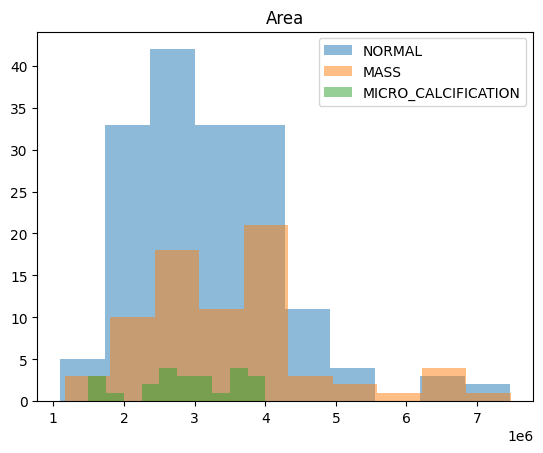

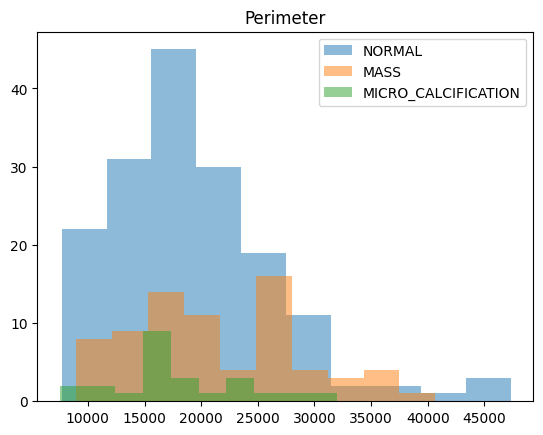

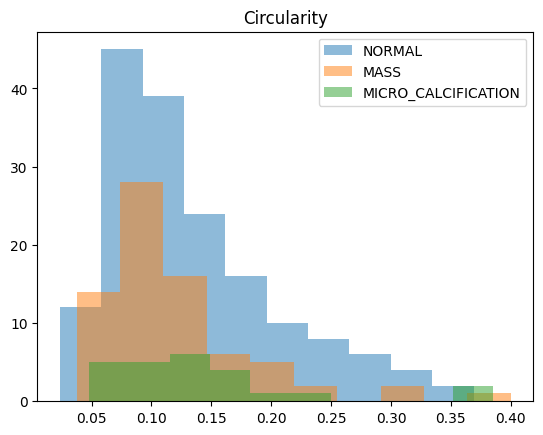

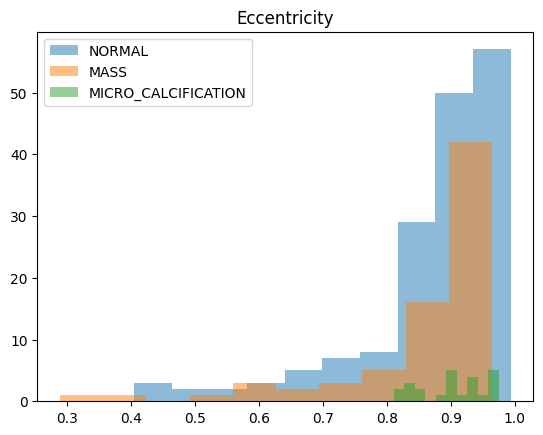

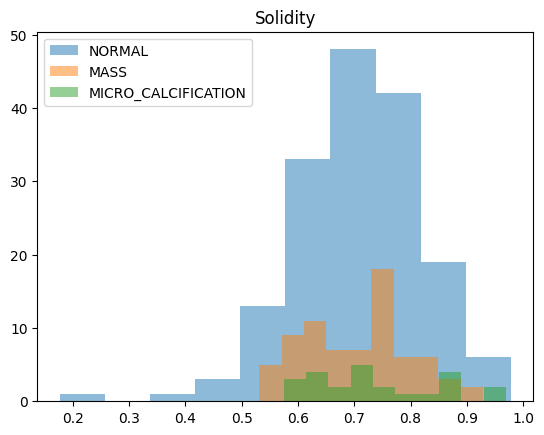

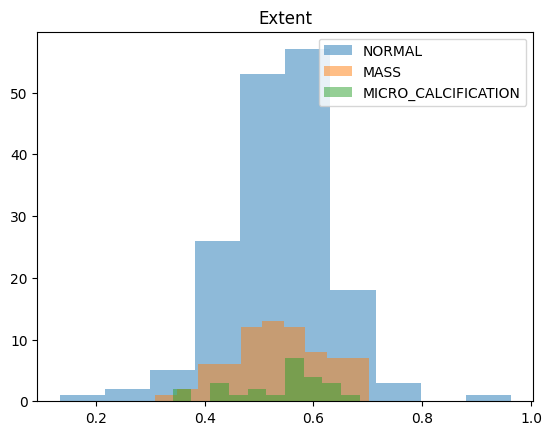

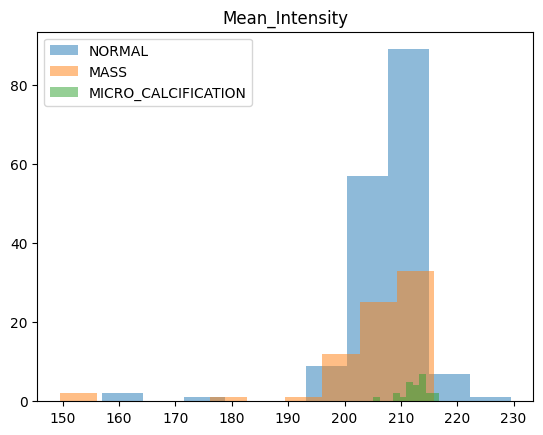

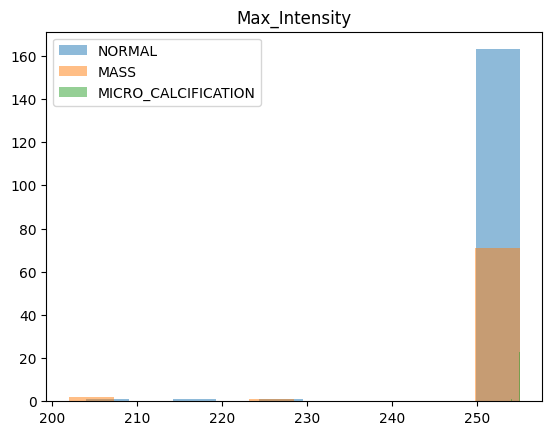

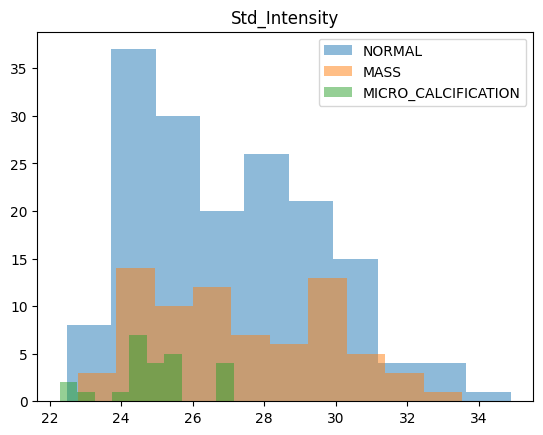

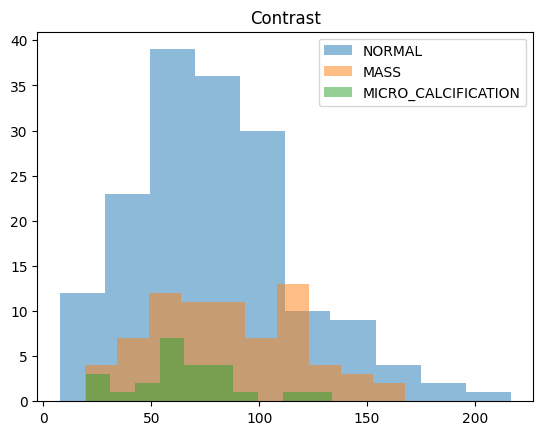

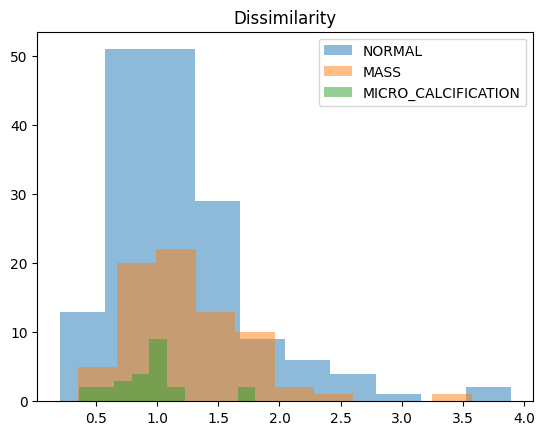

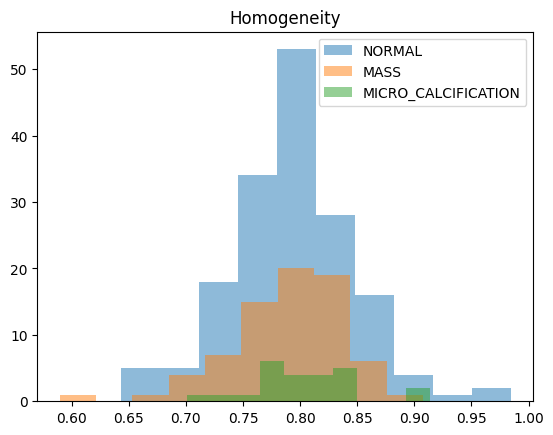

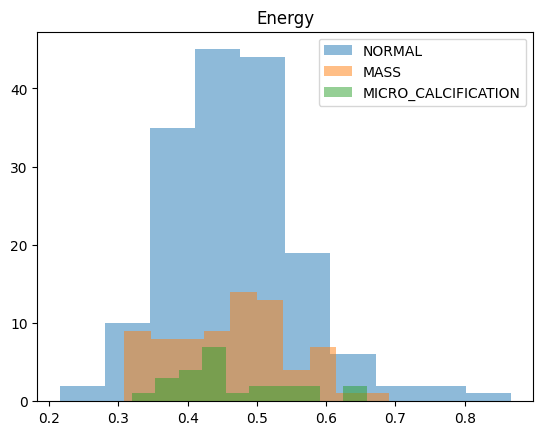

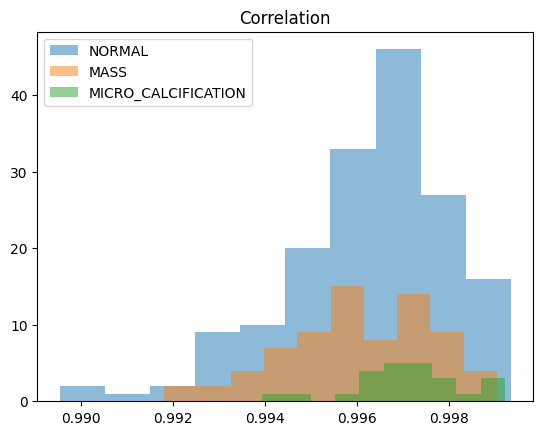

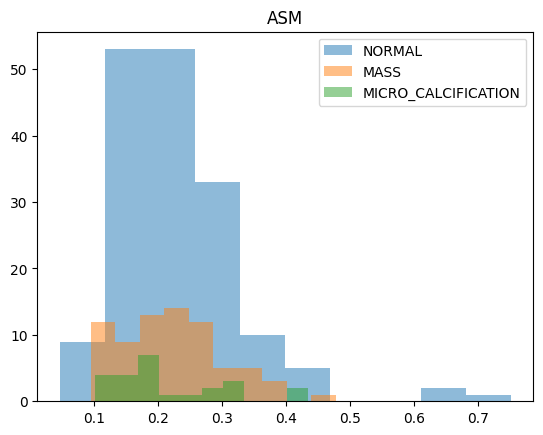

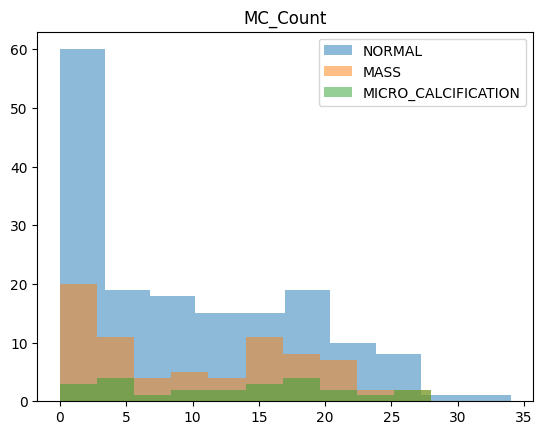

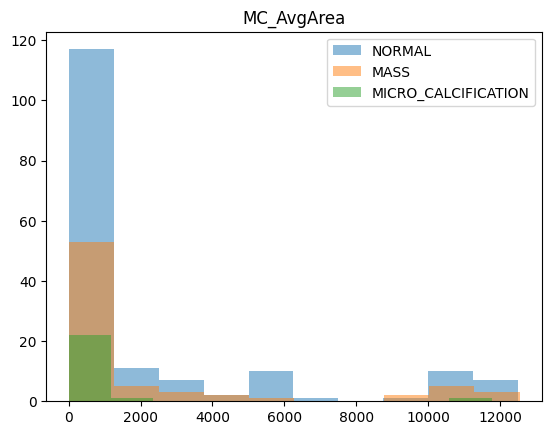

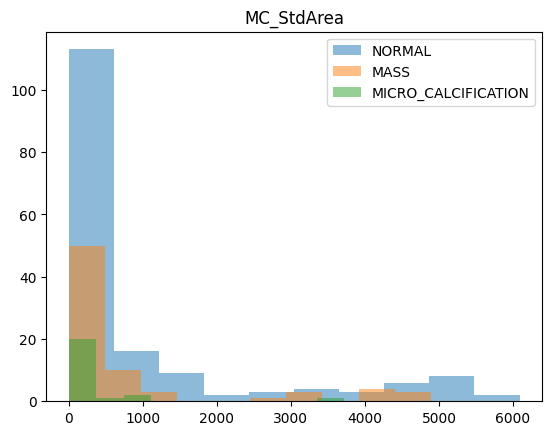

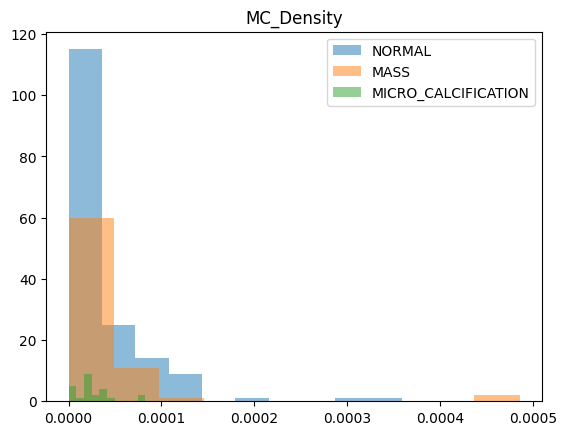

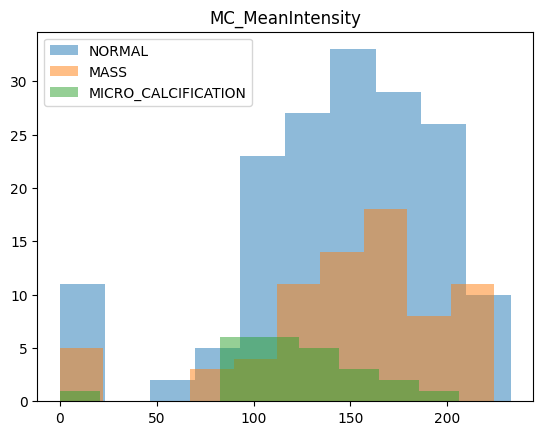

In [75]:
import matplotlib.pyplot as plt
for i, col in enumerate(train_data.columns[:-1]):
    plt.figure()
    for label in ['NORMAL', 'MASS', 'MICRO_CALCIFICATION']:
        plt.hist(train_data[train_data['Label']==label].iloc[:, i], alpha=0.5, label=label)
    plt.title(col)
    plt.legend()
    plt.show()
